# Classificação usando Árvore de Decisão


Bibliotecas e referências usadas:
- scikit-learn
  - sklearn.tree
    - [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - [Post pruning decision trees with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)
  - sklearn.model_selection
    - train_test_split
    - [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
  - sklearn.metrics
    - accuracy_score
    - [precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)
    - [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
    - confusion_matrix
    - [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
- pandas
- numpy
- matplotlib

## Importando os datasets

### Dataset de treinamento: avila-tr.txt

In [340]:
import pandas as pd

labels = ["intercolumnar distance","upper margin","lower margin","exploitation","row number","modular ratio","interlinear spacing","weight","peak number","modular ratio/ interlinear spacing","Class"]

path_dataset_train = "/content/drive/MyDrive/Disciplinas/2022.2/AM-GRAD 2022-2/Projeto AM 2022-2/data/avila-tr.txt"

avila_train = pd.read_csv(path_dataset_train, sep=",",header=None,names=labels)
avila_train.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


### Dataset de teste: avila-ts.txt

In [341]:
path_dataset_test = "/content/drive/MyDrive/Disciplinas/2022.2/AM-GRAD 2022-2/Projeto AM 2022-2/data/avila-ts.txt"

avila_test = pd.read_csv(path_dataset_test, sep=",",header=None,names=labels)
avila_test.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


## Setando a seed do gerador de números aleatórios


- Dessa forma os resultados obtidos pelo modelo não serão diferentes para diferentes sessões

In [342]:
import numpy as np

seed = 32642

np.random.seed(seed)

## Dividindo dataset de treinamento e teste em: features e classes

In [343]:
# Features de treinamento
X_tr = avila_train.drop(['Class'], axis = 1)

# Classes de treinamento
y_tr = avila_train['Class']

print("Dataset de treinamento")
print("Tamanho do dataset de features = ", X_tr.shape)
print("Tamanho do dataset de classes = ", y_tr.shape)

Dataset de treinamento
Tamanho do dataset de features =  (10430, 10)
Tamanho do dataset de classes =  (10430,)


In [344]:
# Features de teste
X_ts = avila_test.drop(['Class'], axis = 1)

# Classes de teste
y_ts = avila_test['Class']

print("Dataset de teste")
print("Tamanho do dataset de features = ", X_ts.shape)
print("Tamanho do dataset de classes = ", y_ts.shape)

Dataset de teste
Tamanho do dataset de features =  (10437, 10)
Tamanho do dataset de classes =  (10437,)


## Modelo padrão de árvore de decisão

In [345]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = seed)
dtc.fit(X_tr, y_tr)

predicted = dtc.predict(X_ts)
predicted

array(['W', 'A', 'A', ..., 'A', 'F', 'H'], dtype=object)

### Análises

#### Resultados de teste:

- Para cada classe:
  - Precisão
  - Recall
  - F1 Score
- Acurácia
- Médias macro e weighted:
  - Precisão
  - Recall
  - F1 Score

In [346]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

cr = classification_report(predicted, y_ts, digits=4)

print(f'Classification report: \n{cr}')

Classification report: 
              precision    recall  f1-score   support

           A     0.9809    0.9800    0.9804      4290
           B     1.0000    1.0000    1.0000         5
           C     0.9806    0.9528    0.9665       106
           D     0.9717    0.9608    0.9662       357
           E     0.9443    0.9478    0.9460      1091
           F     0.9745    0.9795    0.9770      1952
           G     0.9620    0.9685    0.9652       444
           H     0.9635    0.9364    0.9498       535
           I     0.9832    0.9855    0.9844       830
           W     0.9556    0.8431    0.8958        51
           X     0.9176    0.9283    0.9229       516
           Y     0.9288    0.9538    0.9412       260

    accuracy                         0.9694     10437
   macro avg     0.9635    0.9530    0.9580     10437
weighted avg     0.9695    0.9694    0.9694     10437



#### Matriz de confusão

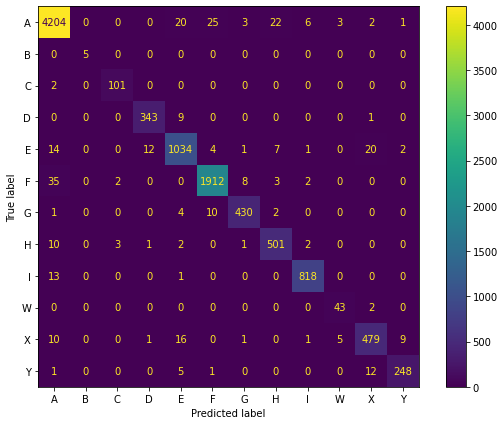

In [347]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_ts, predicted, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)

fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(ax=ax)

plt.show()

#### Poda da árvore

O sckit implementa o algoritmo de Minimal Cost-Complexity Pruning: https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning
- Para usá-lo, teremos que assimilar um valor para o parâmetro: ccp_aplha
- Testaremos diversos valores de ccp_alpha com o auxilio do método: cost_complexity_pruning_path, que nos ajuda retornando conjuntos de ccp_alphas efetivos e, para cada um, valores totais de impurezas.

In [348]:
dtc = DecisionTreeClassifier(random_state=seed)
path = dtc.cost_complexity_pruning_path(X_tr, y_tr)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

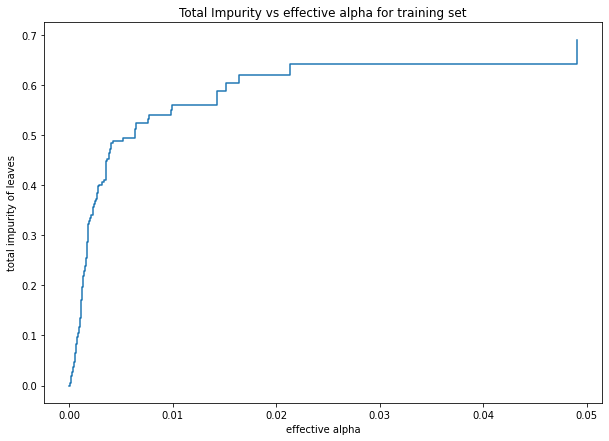

In [349]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(ccp_alphas[:-1], impurities[:-1], drawstyle="steps-post")

ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")

ax.set_title("Total Impurity vs effective alpha for training set")

In [350]:
clfs = []
for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=seed, ccp_alpha=ccp_alpha)
    dtc.fit(X_tr, y_tr)
    clfs.append(dtc)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07964828360707343


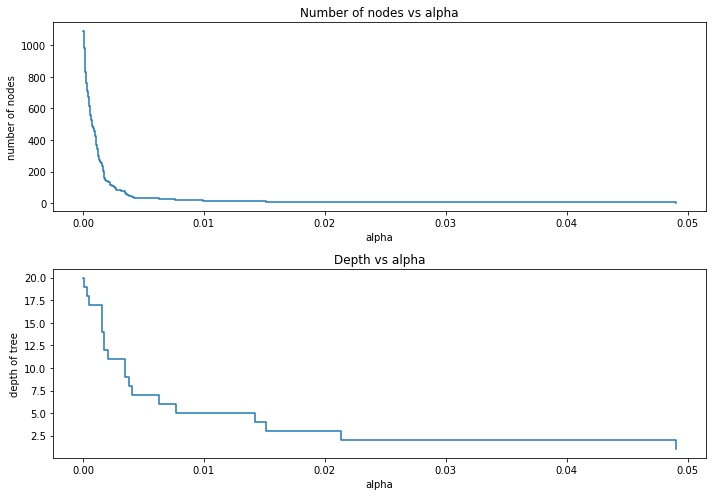

In [351]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dtc.tree_.node_count for dtc in clfs]
depth = [dtc.tree_.max_depth for dtc in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

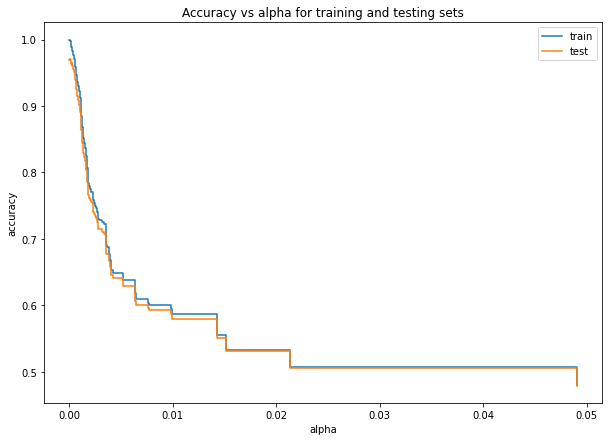

In [352]:
train_scores = [dtc.score(X_tr, y_tr) for dtc in clfs]
test_scores = [dtc.score(X_ts, y_ts) for dtc in clfs]

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Otimização do modelo usando GridSearchCV


Código de referência: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- Usaremos 5 folds para o Cross Validation do modelo, assim permitindo com que pelo menos um elemento da classe B fique em cada fold.

In [353]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

params = {'criterion':['gini', 'entropy', 'log_loss'], 
          'splitter':['best','random'],
          'max_depth':[2,5,10,15,20],
          'ccp_alpha':[0.00001,0.001,0.01,0.1,0.5,0.75],
          'random_state': [seed]}

gs_dtc = GridSearchCV(dtc, params, cv=5, refit=True)

In [354]:
gs_dtc.fit(X_tr, y_tr)
gs_dtc.best_params_

{'ccp_alpha': 1e-05,
 'criterion': 'entropy',
 'max_depth': 20,
 'random_state': 32642,
 'splitter': 'best'}

In [355]:
best_dtc = DecisionTreeClassifier()

best_dtc.set_params(**gs_dtc.best_params_)

best_dtc.fit(X_tr, y_tr)

DecisionTreeClassifier(ccp_alpha=1e-05, criterion='entropy', max_depth=20,
                       random_state=32642)

In [356]:
best_predicted = best_dtc.predict(X_ts)
best_predicted

array(['W', 'A', 'I', ..., 'A', 'F', 'H'], dtype=object)

### Análises do melhor modelo do GridSearchCV

#### Resultados de teste:

- Para cada classe:
  - Precisão
  - Recall
  - F1 Score
- Acurácia
- Médias macro e weighted:
  - Precisão
  - Recall
  - F1 Score

In [357]:
cr = classification_report(best_predicted, y_ts, digits=4)

print(f'Classification report: \n{cr}')

Classification report: 
              precision    recall  f1-score   support

           A     0.9944    0.9949    0.9946      4284
           B     1.0000    1.0000    1.0000         5
           C     0.9806    0.9712    0.9758       104
           D     0.9688    0.9942    0.9813       344
           E     0.9781    0.9649    0.9714      1110
           F     0.9975    0.9924    0.9949      1972
           G     0.9508    0.9907    0.9703       429
           H     0.9788    0.9770    0.9779       521
           I     0.9988    1.0000    0.9994       831
           W     1.0000    0.9574    0.9783        47
           X     0.9579    0.9470    0.9524       528
           Y     0.9700    0.9885    0.9792       262

    accuracy                         0.9875     10437
   macro avg     0.9813    0.9815    0.9813     10437
weighted avg     0.9876    0.9875    0.9875     10437



#### Matriz de confusão

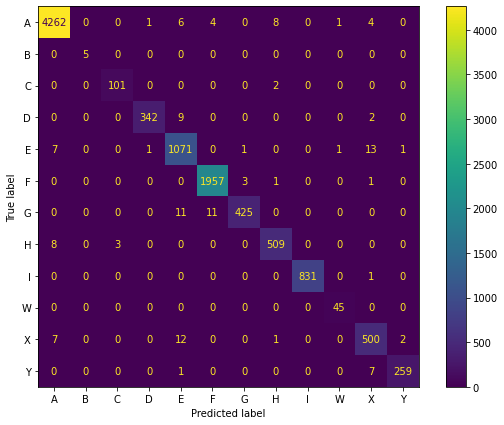

In [358]:
cm = confusion_matrix(y_ts, best_predicted, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)

fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(ax=ax)

plt.show()